<a href="https://colab.research.google.com/github/RenatoBatista/ReconhecimentoDePadroes/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
data = files.upload()
#data = pd.read_csv('../inputs/regression/salary_data.csv')
#site: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression

Saving Salary_Data.csv to Salary_Data.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(data['Salary_Data.csv']))

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
X_, y_ = data.YearsExperience, data.Salary
X_.shape, y_.shape

((30,), (30,))

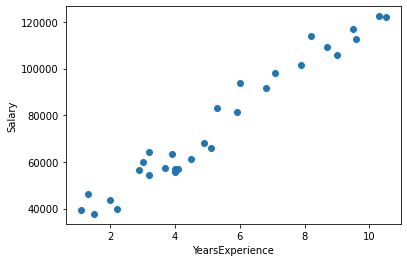

In [8]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(X_, y_)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.column_stack([np.ones(len(X_)),X_.values.reshape(1,-1)[0]])
y = y_.values.reshape(1,-1)

# LR objeto
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X, y_)

ypred = modelo.predict(X)

print(mean_squared_error(y_, ypred))
#print(modelo.intercept_, modelo.coef_)

31270951.722280964


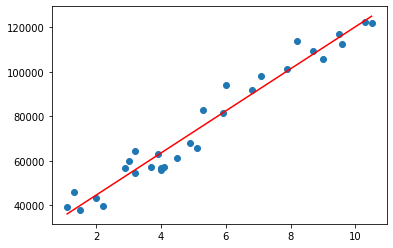

In [10]:
plt.scatter(X_, y_)
plt.plot(X_, ypred, '-', c='r')
plt.show()

In [11]:
print(modelo.coef_)

[   0.         9449.96232146]


In [22]:
X.shape, y.shape

((30, 2), (1, 30))

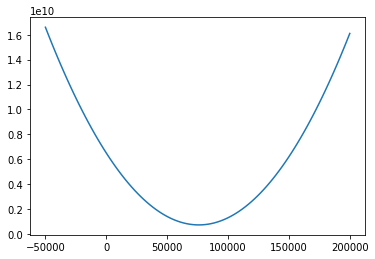

In [41]:
#MSE em função de intercept_
coefs = np.linspace(-50000, 200000, 100)
mses = []

for coef in coefs:
    #print(type(coef), type(np.float64(5.14)) )
    #print(type(modelo.coef_))
    modelo.coef_ = np.array([1,1])
    modelo.intercept_ = coef
    ypred = modelo.predict(X)
    mse = mean_squared_error(y_, ypred)
    #print(mse)
    mses.append(mse)
plt.plot(coefs, mses)
plt.show()

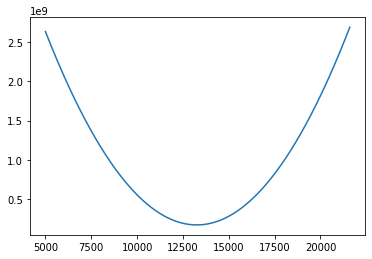

In [62]:
#MSE em função de coef_
coefs = np.linspace(5000, 21600, 1000)
mses = []

for coef in coefs:
    #print(type(coef), type(np.float64(5.14)) )
    modelo.coef_ = np.array([1,coef])
    modelo.intercept_ = 0
    ypred = modelo.predict(X)
    #print(ypred[:,1])
    mse = mean_squared_error(y_, ypred)
    #print(mse)
    mses.append(mse)
plt.plot(coefs, mses)
plt.show()